# Clifton Hill to city

Clifton Hill is the station where the Mernda Line (formerly South Morang) and Hurtsbridge lines meet. The line has been impacted by level crossing work during 2017 and 2018. The station also runs express trains between Clifon Hill and Jolimont in peak periods.

The express trains come from some of the Hurtsbridge line between 6:54am and 9:22am. The express to the city takes 5 min whilst stopping all stations is 8 min. On the outbound journey from 3:41pm to 9:17pm.

The trip from Flinders Street to Clifton Hill is 20min.

In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../MelbDatathon2018/Auth/republic_of_data_2018_linked.json"

def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [2]:
implicit()

[<Bucket: dataprep-staging-abb5d66a-134b-4c90-9774-b91f26c0f3f6>, <Bucket: republic-of-data-original-data>]


In [3]:
%load_ext google.cloud.bigquery

In [4]:
%%bigquery df_clifton_hill_by_day
SELECT StopNameShort
  , mode
  , RouteID
  , IF(StopID IN (20019, 20008, 20006, 20016, 20007, 45795, 20009, 20011,
  20017, 20014, 20012, 20013, 20010, 20015, 20005), true, false) AS SouthMorangPastCliftonHill
-- Rushall, Keon Park, Lalor, Northcote, Thomastown, South Morang, Ruthven, Regent,
-- Merri, Thornbury, Preston, Bell, Reservoir, Croxton, Epping
  , IF(StopID IN (19990, 19930, 19988, 19934, 19989, 19984, 19936, 19987,
  19932, 19931, 19985, 19935, 19929, 19933, 19986, 19928, 19983), true, false) AS HurstbridgePastCliftonHill
-- Hurstbridge, Fairfield, Diamond Creek, Eaglemont, Wattle Glen, Watsonia, Rosanna, Eltham,
-- Darebin, Alphington, Greensborough, Heidelberg, Dennis, Ivanhoe, Montmorency, Westgarth, Macleod
  , IF(StopID IN (19974), true, false) AS CliftonHill
  , IF(StopID IN (64407), true, false) AS Jolimont
  , IF(StopID IN (19975, 19976, 19977, 19978), true, false) AS CliftonHillToJolimont
--   Victoria Park, Collingwood, North Richmond, West Richmond
  , CASE
    WHEN (StopID IN (20019, 20008, 20006, 20016, 20007, 45795, 20009, 20011, 20017, 20014, 20012, 20013, 20010, 20015, 20005))
      THEN 'south_morang'
    WHEN (StopID IN (19990, 19930, 19988, 19934, 19989, 19984, 19936, 19987, 19932, 19931, 19985, 19935, 19929, 19933, 19986, 19928, 19983))
      THEN 'hurstbridge'
    WHEN (StopID IN (19928))
      THEN 'westgarth'
    WHEN (StopID IN (19974))
      THEN 'clifton_hill'
    WHEN (StopID IN (19975, 19976, 19977, 19978))
      THEN 'jolimont_to_clifton_hill'
    WHEN (StopID IN (64407))
      THEN 'jolimont'
    ELSE
      'unknown'
    END AS route
  , StopID
  , ScanType
  , EXTRACT(YEAR FROM BusinessDate) AS year
  , FinancialQuarter
  , MonthNumber
  , CalendarWeek
  , DayType
  , isSchoolHoliday
  , WeekDay
  , isLongWeekend
  , DATE(BusinessDate) as date
  , count(*) AS count
  FROM clean.scans s
RIGHT JOIN data.stop_locations ON StopID = StopLocationID
JOIN clean.Calendar_Features cf ON cf.Date = s.BusinessDate
  WHERE
    RouteID IN (18, 20) -- (Mernda Line, Hurstbridge)
    AND mode = 2
  GROUP BY StopNameShort
    , mode
    , RouteID
    , StopID
    , ScanType
    , EXTRACT(YEAR FROM BusinessDate)
    , FinancialQuarter
    , MonthNumber
    , CalendarWeek
    , DayType
    , isSchoolHoliday
    , WeekDay
    , isLongWeekend
    , BusinessDate


,StopNameShort,mode,RouteID,SouthMorangPastCliftonHill,HurstbridgePastCliftonHill,CliftonHill,Jolimont,CliftonHillToJolimont,route,StopID,...,year,FinancialQuarter,MonthNumber,CalendarWeek,DayType,isSchoolHoliday,WeekDay,isLongWeekend,date,count
0,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2015,FY15-16Q1,7,29,Weekday,False,Friday,False,2015-07-24,1580
1,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2015,FY15-16Q1,7,29,Weekday,False,Friday,False,2015-07-24,2204
2,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2016,FY15-16Q4,4,14,Weekday,True,Tuesday,False,2016-04-05,584
3,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2016,FY15-16Q4,4,14,Weekday,True,Tuesday,False,2016-04-05,345
4,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2016,FY16-17Q2,12,50,Saturday,False,Saturday,False,2016-12-17,361
5,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2016,FY16-17Q2,12,50,Saturday,False,Saturday,False,2016-12-17,294
6,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2017,FY17-18Q1,8,35,Weekday,False,Wednesday,False,2017-08-30,512
7,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2017,FY17-18Q1,8,35,Weekday,False,Wednesday,False,2017-08-30,400
8,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2018,FY17-18Q4,5,19,Sunday,False,Sunday,False,2018-05-13,996
9,Jolimont-MCG,2,18,False,False,False,True,False,jolimont,64407,...,2018,FY17-18Q4,5,19,Sunday,False,Sunday,False,2018-05-13,979


In [6]:
%matplotlib inline

## Impact of Bus replacements

Below shows a clear drop off in touch on/off for the Hurstbridge line as it has been replaced by busses (orange line)

Also a sharp rise in touc on/off for Clifton Hill (blue line) as that is where people now scan on/off

Interestingly there are overall less touch on/off for this period
* what are people doing?

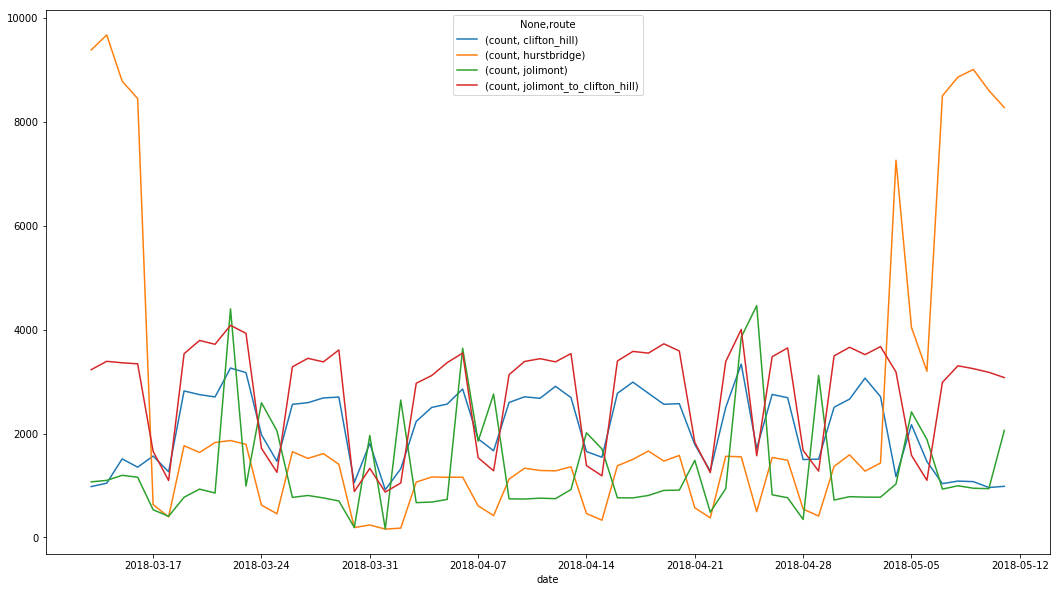

In [23]:
import datetime as dt

# Bus replacement on Hurstbridge line March to May 2018
df = df_clifton_hill_by_day[
    (df_clifton_hill_by_day['date'] > dt.datetime(2018, 3, 12).date()) &
    (df_clifton_hill_by_day['date'] < dt.datetime(2018, 5, 12).date())
]
df = df[df['route'] != 'south_morang'] # drop South Morang line
df = df[['date', 'route', 'count']].groupby(['date', 'route']).sum().unstack()

# df = df_clifton_hill_by_day[['date', 'Sample', 'count']].pivot(columns='Sample', values=['date', 'count'])
df.plot(figsize=(18, 10))

## Football/events at MCG

Using the South Morang line as a base, Jolimont traffic has clear weekend peaks. This could be used to find Myki users that support football and potentially a particular team.

There is a surprising dip on round 13 - Sat 16/6 Hawthorn vs Adelaide Crows and Sun 17/6 Geelong vs Richmond. There seems also a dip round 10 - Sat 26/5 Richmond vs St Kilda
* why would this be?
* are Richmond supporters more likely to walk?

Also State of Origin rugby league can be seen Wed June 6 2018

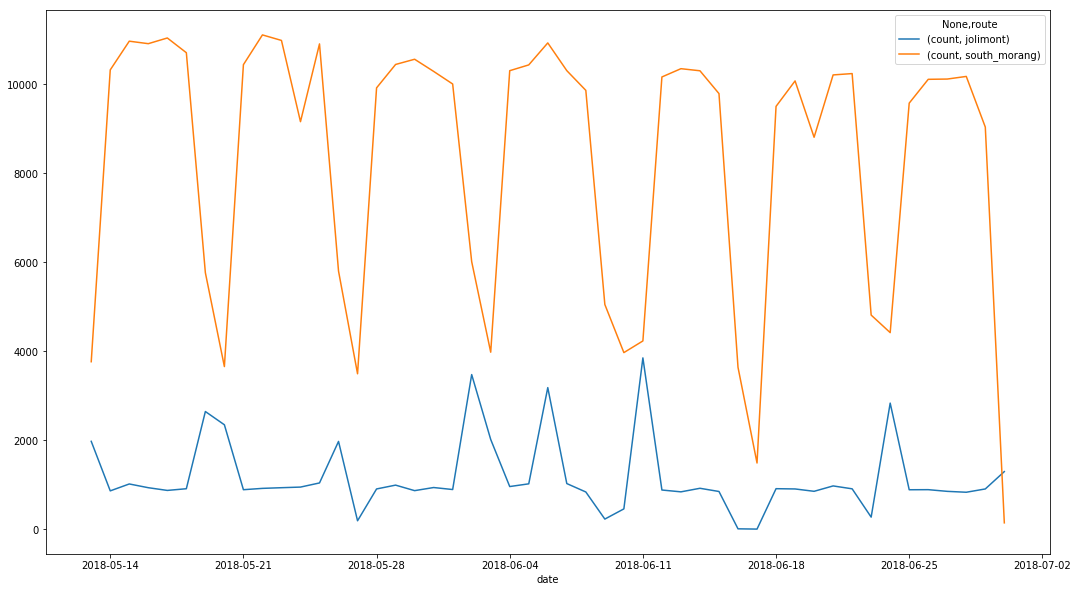

In [31]:
df = df_clifton_hill_by_day[
    (df_clifton_hill_by_day['date'] > dt.datetime(2018, 5, 12).date()) &
    (df_clifton_hill_by_day['date'] < dt.datetime(2018, 7, 12).date())
]
df = df[df['route'].isin(['jolimont', 'south_morang'])] # drop South Morang line
df = df[['date', 'route', 'count']].groupby(['date', 'route']).sum().unstack()

# df = df_clifton_hill_by_day[['date', 'Sample', 'count']].pivot(columns='Sample', values=['date', 'count'])
df.plot(figsize=(18, 10))